In [ ]:
#Question 4 (5 points):
#Using the LifeExpectancy data in the country table on the y-axis, plot this data against some other value.
#Suggestions for the x-axis: GNP, Population or IndepYear could be interesting, but up to you.
#I'd suggest using SQLAlchemy, get the data and make either a dataframe or numpy arrays and then use matplotlib to plot.

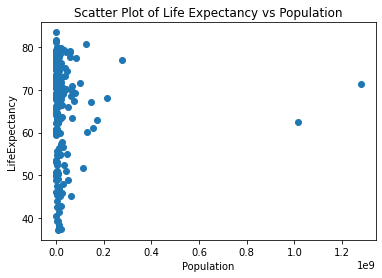

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine, MetaData, Table

# Define the database URL
engine = create_engine('sqlite:////blue/bsc4452/Marisa1988/ps5-mmm/world.sqlite')
connection = engine.connect()
metadata = MetaData()

# Reflect the table
country = Table('country', metadata, autoload_with=engine)

# Query the data
query = connection.execute(country.select())
data = query.fetchall()

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=query.keys())

# Create a scatter plot with column 6 (Population) on the x-axis and column 7 (Life Expectancy) on the y-axis
plt.scatter(df.iloc[:, 6], df.iloc[:, 7])

# Set the labels for the axes
plt.xlabel(df.columns[6])
plt.ylabel(df.columns[7])

# Set the title of the plot
plt.title('Scatter Plot of Life Expectancy vs Population')

# Show the plot
plt.show()


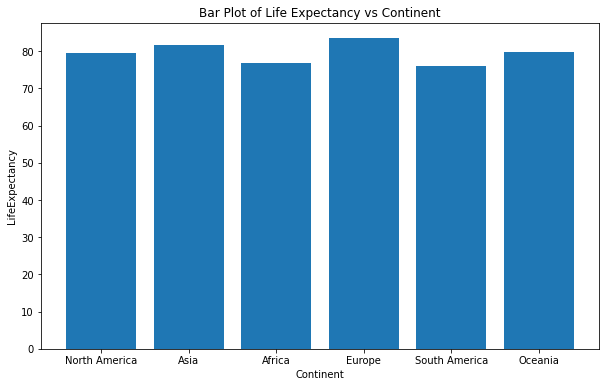

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine, MetaData, Table

# Define the database URL
engine = create_engine('sqlite:////blue/bsc4452/Marisa1988/ps5-mmm/world.sqlite')
connection = engine.connect()
metadata = MetaData()

# Reflect the table
country = Table('country', metadata, autoload_with=engine)

# Query the data
query = connection.execute(country.select())
data = query.fetchall()

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=query.keys())

# Create a bar plot with column 2 (Continent) on the x-axis and column 7 (Life Expectancy) on the y-axis
plt.figure(figsize=(10, 6))
plt.bar(df.iloc[:, 2], df.iloc[:, 7])

# Set the labels for the axes
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[7])

# Set the title of the plot
plt.title('Bar Plot of Life Expectancy vs Continent')

# Show the plot
plt.show()


In [ ]:
#Grad student extra credit (5 points):
#Plot LifeExpectancy vs the ratio of the total population of all the cities in the country divided by the total population of the country. 
#This is an approximation of the % urban population in the country.

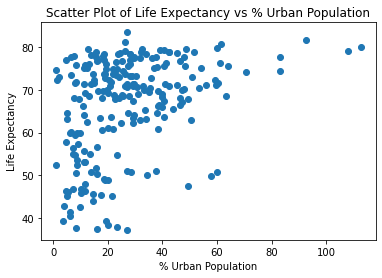

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine, MetaData, Table

# Define the database URL
engine = create_engine('sqlite:////blue/bsc4452/Marisa1988/ps5-mmm/world.sqlite')
connection = engine.connect()
metadata = MetaData()

# Reflect the tables
country = Table('country', metadata, autoload_with=engine)
city = Table('city', metadata, autoload_with=engine)

# Query the data from the 'country' table
country_query = connection.execute(country.select())
country_data = country_query.fetchall()
country_df = pd.DataFrame(country_data, columns=country_query.keys())

# Query the data from the 'city' table
city_query = connection.execute(city.select())
city_data = city_query.fetchall()
city_df = pd.DataFrame(city_data, columns=city_query.keys())

# Calculate the % urban population for each country
urban_population = city_df.groupby('CountryCode')['Population'].sum()
total_population = country_df.set_index('Code')['Population']
urban_percentage = (urban_population / total_population) * 100

# Create a new DataFrame for the 'urban' table
urban_df = pd.DataFrame({
    'CountryCode': urban_percentage.index,
    'UrbanPercentage': urban_percentage.values
}).reset_index(drop=True)

# Merge the 'urban' DataFrame with the 'country' DataFrame to get LifeExpectancy
merged_df = pd.merge(urban_df, country_df[['Code', 'LifeExpectancy']], left_on='CountryCode', right_on='Code')

# Create a scatter plot with LifeExpectancy on the y-axis and % urban population on the x-axis
plt.scatter(merged_df['UrbanPercentage'], merged_df['LifeExpectancy'])

# Set the labels for the axes
plt.xlabel('% Urban Population')
plt.ylabel('Life Expectancy')

# Set the title of the plot
plt.title('Scatter Plot of Life Expectancy vs % Urban Population')

# Show the plot
plt.show()
